In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\Robin Sharma\Documents\IMDb Movies India.csv", encoding="latin1")

In [3]:
df = df.dropna(subset=["Rating"])

df["Year"] = df["Year"].str.extract(r"(\d{4})")
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

df["Duration"] = df["Duration"].str.extract(r"(\d+)")
df["Duration"] = pd.to_numeric(df["Duration"], errors="coerce")

df["Votes"] = df["Votes"].str.replace(",", "", regex=True)
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce")


In [4]:
features = ["Year", "Duration", "Votes", "Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]
X = df[features]
y = df["Rating"]

cat_cols = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]
num_cols = ["Year", "Duration", "Votes"]


In [5]:
numeric_transformer = SimpleImputer(strategy="median")
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [7]:
rf_model = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", RandomForestRegressor(n_estimators=100, random_state=42))])

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance:")
print(f"   RMSE = {rmse:.3f}")
print(f"   R²   = {r2:.3f}\n")

Random Forest Performance:
   RMSE = 1.081
   R²   = 0.371



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
encoder = rf_model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["encoder"]
encoded_cat_features = encoder.get_feature_names_out(cat_cols)

In [9]:
all_features = np.concatenate([num_cols, encoded_cat_features])

In [10]:
importances = rf_model.named_steps["model"].feature_importances_
importance_df = pd.DataFrame({"Feature": all_features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False).head(20)  # top 20 features


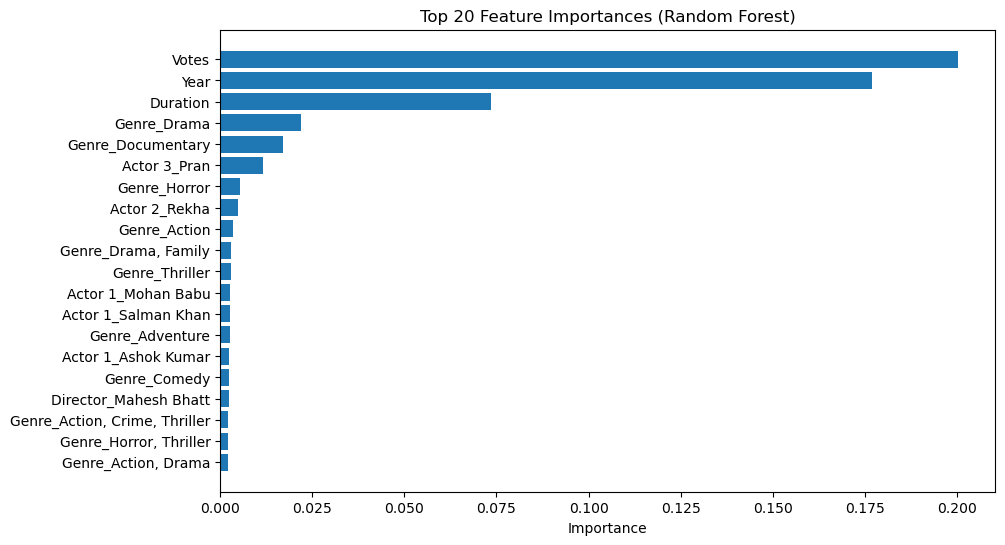

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()